In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

# Trend

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaomiaoright/TimeSeriesProjects/master/Dataset/HospitalityEmployees.csv')

In [3]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [5]:
df.columns =['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


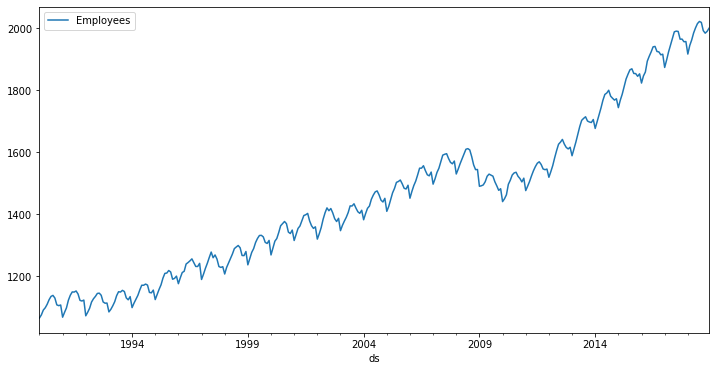

In [6]:
df.plot(x='ds',y='y', figsize=(12,6), label='Employees')

In [7]:
df.shape

(348, 2)

In [8]:
# To predict 12 months
test = df[-12:]
train = df[:-12]

## Create Prophet model

In [10]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Create future dataframe and Predict

In [11]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

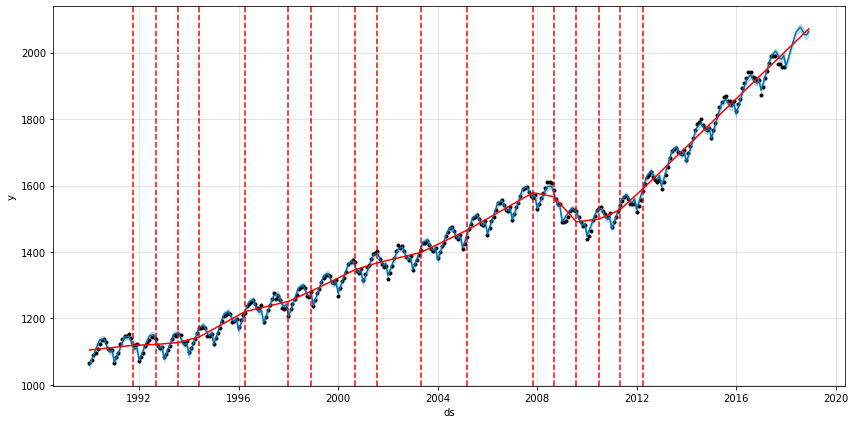

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast, figsize=(12,6))
a = add_changepoints_to_plot(fig.gca(), model, forecast)

# Seasonality

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaomiaoright/TimeSeriesProjects/master/Dataset/Airline_passengers.csv') 
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [17]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


## Split Train Test

In [18]:
## create prophet model

In [19]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=50, freq='MS')
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.146447,54.427408,113.867828,107.146447,107.146447,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,85.667868
1,1949-02-01,109.300675,51.045991,107.844019,109.300675,109.300675,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,0.0,0.0,0.0,79.176553
2,1949-03-01,111.246429,81.386248,137.955858,111.246429,111.246429,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,0.0,0.0,0.0,110.839332
3,1949-04-01,113.400657,78.149869,136.645654,113.400657,113.400657,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,0.0,0.0,0.0,108.472210
4,1949-05-01,115.485393,81.927100,140.478872,115.485393,115.485393,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,0.0,0.0,0.0,111.854130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1964-10-01,625.549283,575.232136,632.289539,620.299097,630.317802,-21.559742,-21.559742,-21.559742,-21.559742,-21.559742,-21.559742,0.0,0.0,0.0,603.989541
190,1964-11-01,628.671903,540.748593,598.386917,623.236687,633.635970,-59.503975,-59.503975,-59.503975,-59.503975,-59.503975,-59.503975,0.0,0.0,0.0,569.167927
191,1964-12-01,631.693793,568.738120,628.003590,626.064747,636.843761,-33.362872,-33.362872,-33.362872,-33.362872,-33.362872,-33.362872,0.0,0.0,0.0,598.330921
192,1965-01-01,634.816413,581.889545,641.264463,629.030355,640.201799,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,613.337834


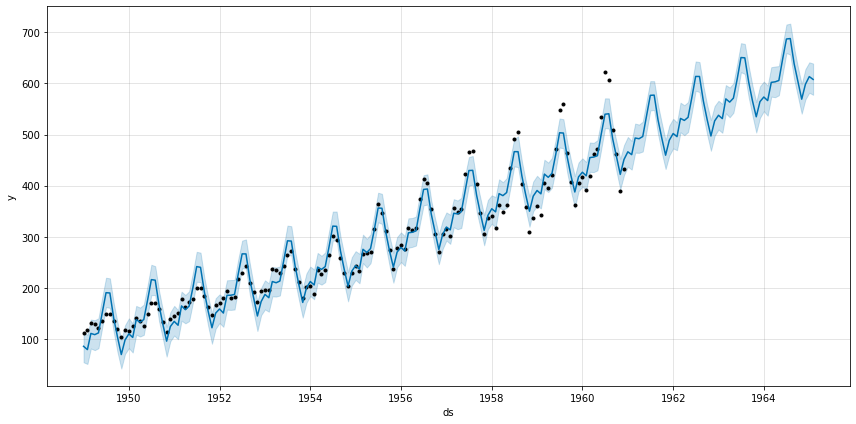

In [22]:
fig = model.plot(forecast, figsize=(12,6))

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality

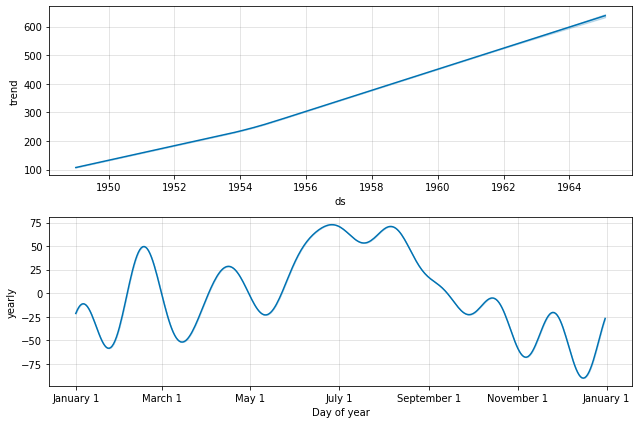

In [23]:
fig = model.plot_components(forecast)

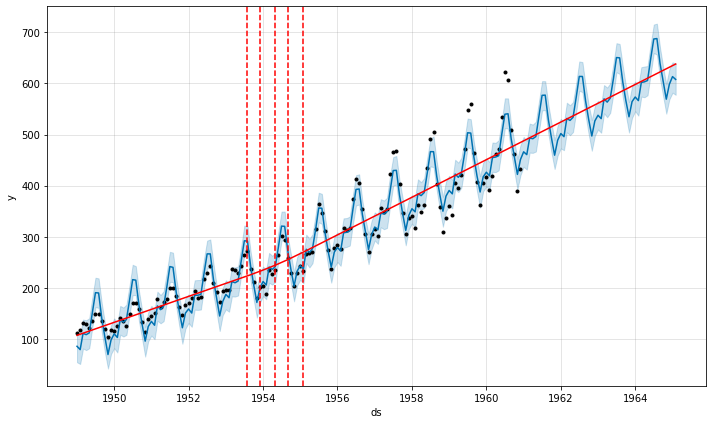

In [24]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

## Update prophet model with seasonality mode

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


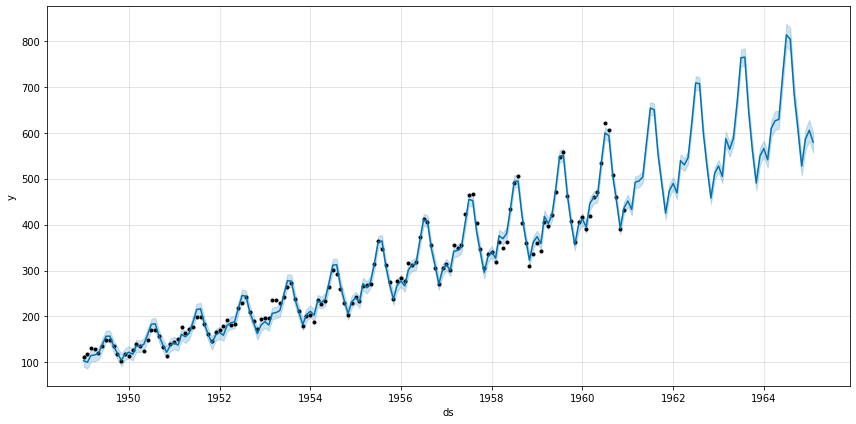

In [25]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=50, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast, figsize=(12,6))

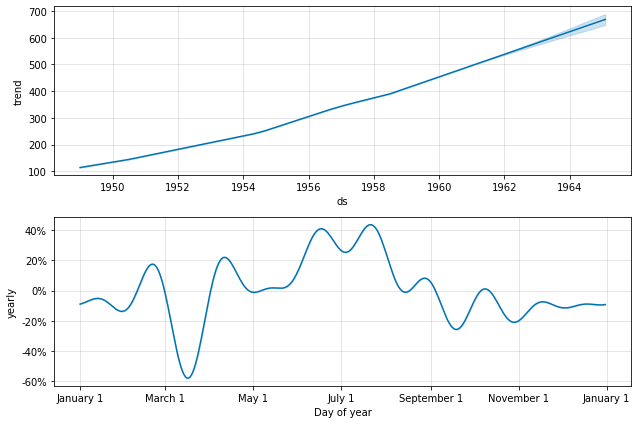

In [26]:
fig = model.plot_components(forecast)

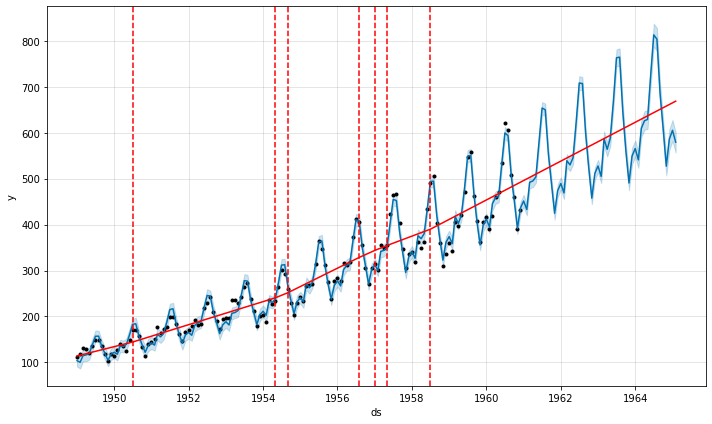

In [27]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)